## Ejemplo 5: NLP y Visualizaciones

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### 2. Desarrollo:

Como ya bien sabes, las visualizaciones son una parte esencial de nuestros análisis. Vamos a aprender cómo realizar algunas visualizaciones de los análisis estadísticos que ya hemos realizado. Esto nos ayudará a presentar nuestros hallazgos de manera más efectiva.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('../../Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [64]:
df['rank.numberInt'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,  1, 11, 15, 16])

In [3]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

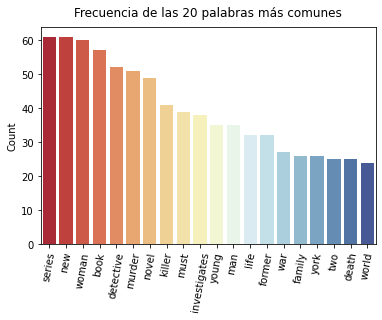

In [31]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

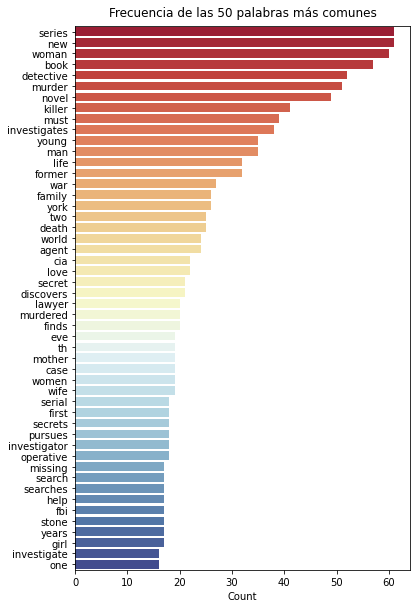

In [43]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(most_common_50[:, 1], most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [70]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('of', 'the'): 105, ('in', 'the'): 99, ('of', 'a'): 93, ('in', 'a'): 61, ('and', 'a'): 38, ('a', 'woman'): 34, ('book', 'of'): 33, ('for', 'the'): 32, ('to', 'the'): 31, ('and', 'the'): 30, ...})

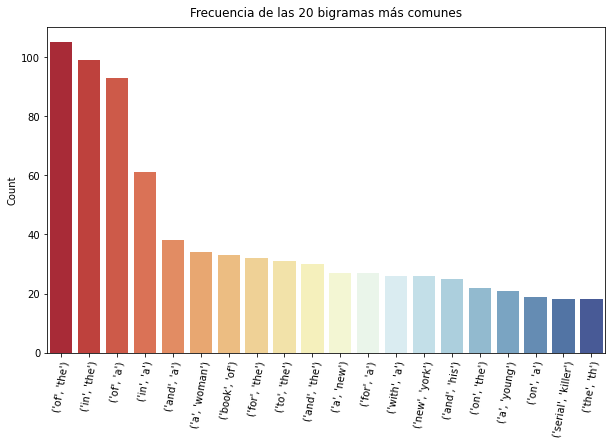

In [72]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [73]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('new', 'york'): 26, ('serial', 'killer'): 18, ('stone', 'barrington'): 12, ('los', 'angeles'): 10, ('eve', 'dallas'): 10, ('writing', 'pseudonymously'): 10, ('lt', 'eve'): 9, ('nora', 'roberts'): 9, ('roberts', 'writing'): 9, ('fbi', 'agent'): 8, ...})

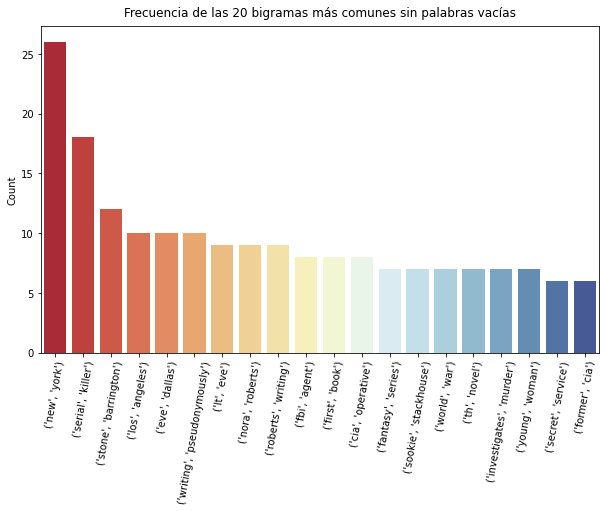

In [74]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [75]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

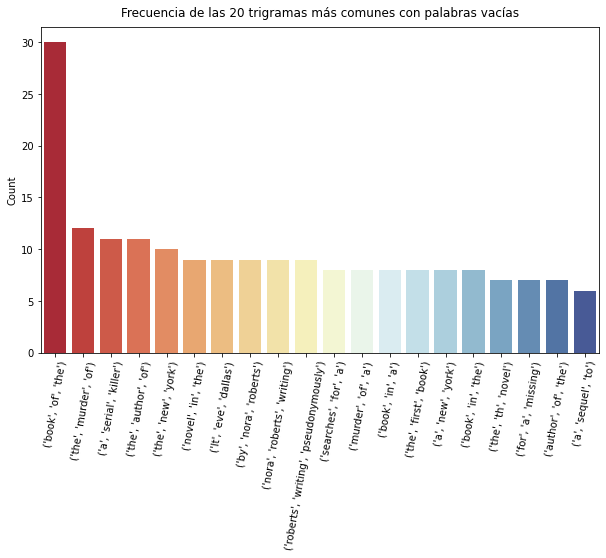

In [79]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

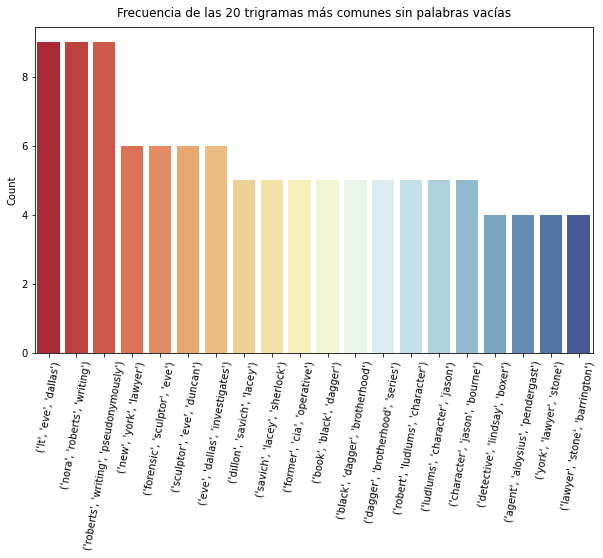

In [80]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [55]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

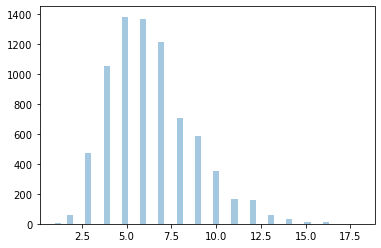

In [56]:
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [58]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

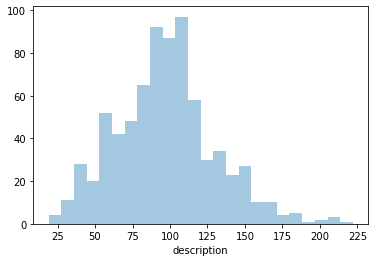

In [59]:
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

In [60]:
num_of_words = grouped_by_title.str.split(' ').str.len()

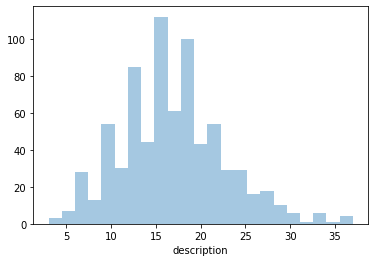

In [62]:
sns.distplot(num_of_words, kde=False, norm_hist=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [82]:
from wordcloud import WordCloud

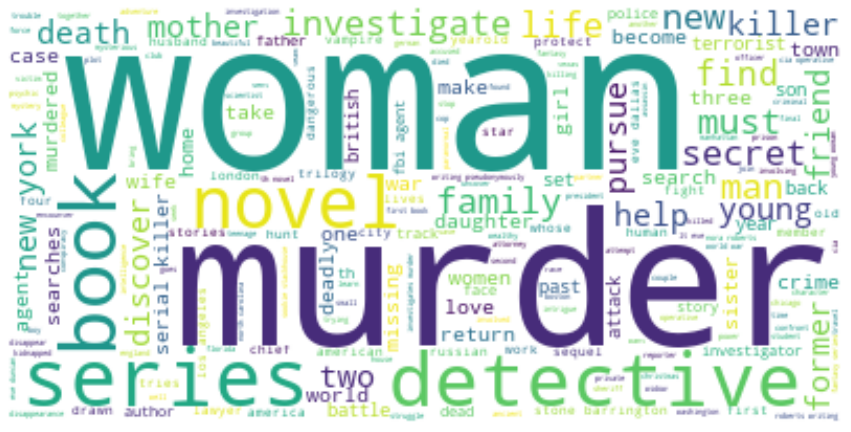

In [98]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()